# Import

In [2]:
import os, warnings

# data
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder
# metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
# estimators
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Visuaisation
import matplotlib.pyplot as plt

In [3]:
# Warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

# Load data

In [5]:
path = "./data/cleaned/"
filename = "df_cleaned.csv"

In [6]:
df = pd.read_csv(path + filename)
df.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# data preparation

In [7]:
# X & y
X = df.drop(columns="target")
y = df.target

In [8]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

## Test Train split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print(f"X_train = {X_train.shape} et y_train = {y_train.shape} \nx_test = {X_test.shape} et y_test={y_test.shape}")

X_train = (5686, 21) et y_train = (5686,) 
x_test = (2438, 21) et y_test=(2438,)


# Modelisation

## Dummy classifier

In [12]:
estimator = DummyClassifier(strategy="most_frequent")
estimator.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [13]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
pd.Series(y_pred).value_counts()

0    2438
dtype: int64

In [15]:
y_test.value_counts(normalize=True)

0    0.515587
1    0.484413
Name: target, dtype: float64

In [16]:
y_test.values

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [17]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f"score train : {tr_score} score test : {te_score} ")

score train : 0.519 score test : 0.5156 


In [18]:
def score(estimator) :
    """compute and print train score and test score"""
    tr_score = estimator.score(X_train, y_train).round(4)
    te_score = estimator.score(X_test, y_test).round(4)
    print(f"score train : {tr_score} score test : {te_score}")

In [19]:
score(estimator)

score train : 0.519 score test : 0.5156


In [20]:
pd.Series(y_train).value_counts(normalize=True).round(4)

0    0.519
1    0.481
Name: target, dtype: float64

In [21]:
pd.Series(y_test).value_counts(normalize=True).round(4)

0    0.5156
1    0.4844
Name: target, dtype: float64

In [23]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[1257,    0],
       [1181,    0]], dtype=int64)

In [24]:
mat  = pd.DataFrame(mat)
mat

,0,1
0,1257,0
1,1181,0


In [25]:
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [26]:
def confusion(y_test, y_pred) :
    """display a fancy confusion matrix"""
    mat = confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f"pred_{i}" for i in mat.columns]
    mat.index = [f"test_{i}" for i in mat.index]

    return mat

In [27]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

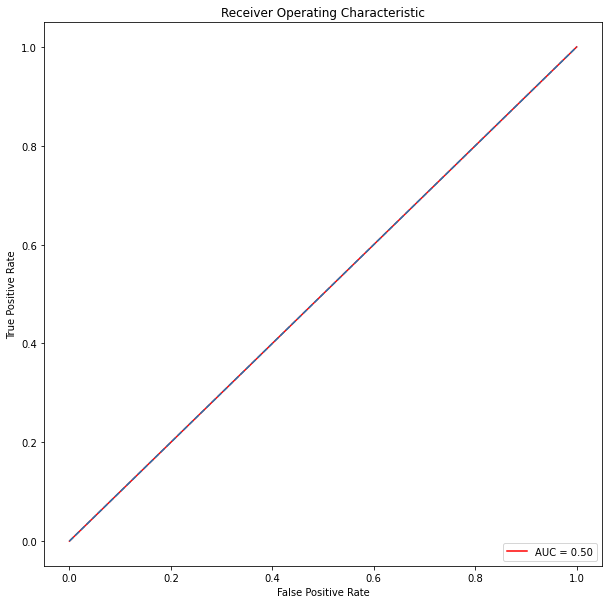

In [29]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label="AUC = %0.2f" % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()